## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
detail_results_df = pd.merge(mouse_metadata, study_results,
                                 how='outer', on='Mouse ID')

# Display the data table to see how many rows total
detail_results_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
detail_results_df["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
detail_results_df.loc[detail_results_df.duplicated(['Mouse ID','Timepoint']), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#Set index to mouse ID
detail_results_df = detail_results_df.set_index("Mouse ID")
detail_results_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop duplicated mouse by removing the index which was set to it's ID above
cleaned_df=detail_results_df.drop(["g989"])
cleaned_df.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Reset index
cleaned_df=cleaned_df.reset_index()
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume
clean_mean = np.mean(cleaned_df["Tumor Volume (mm3)"])

clean_median = np.median(cleaned_df["Tumor Volume (mm3)"])

clean_variance = np.var(cleaned_df["Tumor Volume (mm3)"], ddof=8)

clean_sd = np.std(cleaned_df["Tumor Volume (mm3)"], ddof=0)

clean_sem = st.sem(cleaned_df["Tumor Volume (mm3)"])

# Assemble the resulting series into a single summary dataframe.
initial_summary_tumor_volume = { "Mean": clean_mean, "Median": clean_median, "Variance": clean_variance, 
                                "Standard Deviation": clean_sd, "SEM": clean_sem}
pd.DataFrame([initial_summary_tumor_volume])

,Mean,Median,Variance,Standard Deviation,SEM
0,50.435293,48.933454,79.760044,8.911826,0.205591


In [12]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Use groupby
by_regimen_df=cleaned_df.groupby(["Drug Regimen"])
#by_regimen_df.count()

#confirm groupby and see summary stats of Tumor Volume
by_regimen_df["Tumor Volume (mm3)"].describe()



,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [13]:
#Calculate the required properties
grouped_mean = by_regimen_df["Tumor Volume (mm3)"].mean()
grouped_median = by_regimen_df["Tumor Volume (mm3)"].median()
grouped_variance = by_regimen_df["Tumor Volume (mm3)"].var()
grouped_sd= by_regimen_df["Tumor Volume (mm3)"].std()
grouped_sem1= by_regimen_df["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.
drug_regimen_summary=pd.DataFrame({ "Mean": grouped_mean, "Median": grouped_median, "Variance": grouped_variance,
                                  "Standard Deviation": grouped_sd, "SEM": grouped_sem1})
drug_regimen_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_results=cleaned_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": [np.mean, np.median,np.var, np.std, st.sem]})

agg_results

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#Create new DF using only the two series needed
time_reg_df=cleaned_df[["Drug Regimen", "Timepoint"]]
#groupby the regimen
time_reg_df=time_reg_df.groupby("Drug Regimen").count()

time_reg_df.head


<bound method NDFrame.head of               Timepoint
Drug Regimen           
Capomulin           230
Ceftamin            178
Infubinol           178
Ketapril            188
Naftisol            186
Placebo             181
Propriva            148
Ramicane            228
Stelasyn            181
Zoniferol           182>

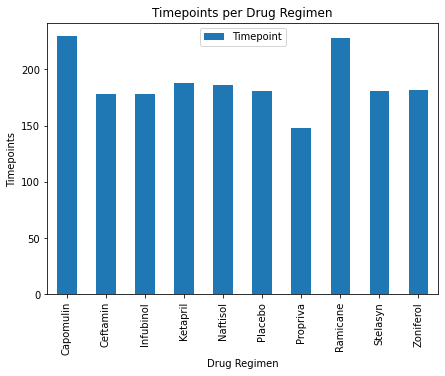

<Figure size 432x288 with 0 Axes>

In [16]:
# Configure plot and ticks, assign title and format
time_reg_df.plot(kind="bar", figsize=(7,5))
plt.title("Timepoints per Drug Regimen")
plt.ylabel("Timepoints")
plt.show()
plt.tight_layout()

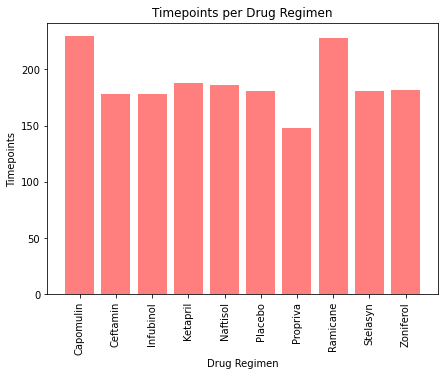

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#reset index so can use "Drug Regimen" as a lable
time_reg_df=time_reg_df.reset_index()

# Set x axis and tick locations

x_axis = np.arange(len(time_reg_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(7,5))
plt.bar(x_axis, time_reg_df["Timepoint"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, time_reg_df["Drug Regimen"], rotation="vertical")

# Set a Title and labels
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")



plt.show()


In [15]:
# Get counts of Mice by gender to make the Pie Plots

#Get one mouse per ID
one_per=cleaned_df.drop_duplicates(subset=["Mouse ID"])
#group by "Sex"
grouped_gender_df=one_per.groupby(["Sex"])
#count those groups
gender_count=grouped_gender_df.count()
gender_count

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,123,123,123,123,123,123,123
Male,125,125,125,125,125,125,125


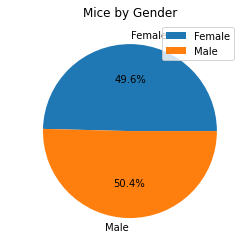

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#generate pie plot
#you can use any key as Y since the counts are by gender
#to not make it confusing drop the Y label
gender_count.plot(kind='pie', y='Mouse ID',ylabel=' ',autopct="%1.1f%%", title="Mice by Gender")
plt.show()

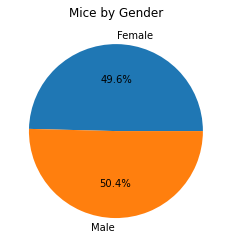

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#setting parameters
y= grouped_gender_df["Sex"].count()
mylabels=["Female", "Male"]


#draw the plot using parameters set above
#purposely used different colors and different alignment
plt.pie(y, labels=mylabels, autopct="%1.1f%%")
plt.title("Mice by Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
#Narrow down to just the four drugs we are interested in
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = cleaned_df[cleaned_df['Drug Regimen'].isin(drug_list)]
filtered_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Start by getting the last (greatest) timepoint for each mouse
last_tp=filtered_df.drop_duplicates(subset=["Mouse ID"], keep='last', ignore_index=True)
last_tp.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [20]:
#groupby the drug regimen
last_tp2 = last_tp.groupby("Drug Regimen")
last_tp2.mean()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,14.04,20.12,41.0,36.667568,1.28
Ceftamin,12.80,27.40,30.6,57.753977,1.72
Infubinol,16.40,27.32,30.6,58.178246,1.60
Ramicane,10.84,20.00,40.6,36.191390,1.20


In [21]:
# Calculate the IQR using the groupby 
sq1= last_tp2["Tumor Volume (mm3)"].quantile(.25)
sq2= last_tp2["Tumor Volume (mm3)"].quantile(.25)
sq3=last_tp2["Tumor Volume (mm3)"].quantile(.75)
siqr = sq3-sq1 
slower_bound = sq1 - (1.5*siqr)
supper_bound = sq3 + (1.5*siqr)

#create a df that has the boundaries 
limits_df2= pd.DataFrame({"Lower Boundary": slower_bound, "Upper Boundary": supper_bound})

limits_df2

,Lower Boundary,Upper Boundary
Drug Regimen,,
Capomulin,20.704562,51.832015
Ceftamin,25.355450,87.666458
Infubinol,36.832905,82.741446
Ramicane,17.912664,54.306811


In [22]:
#merge the boundary limits calculated above to the mice data that only contains final volume for each mouse
merge_df=pd.merge(last_tp, limits_df2, how="left", on=["Drug Regimen"])
#merge_df=merge_df.reindex(columns=['Mouse ID','Drug Regimen','Sex','Age_months','Weight (g)','Timepoint','Tumor Volume (mm3)',
                                   #'Metastatic Sites','Lower Boundary','Upper Boundary','Lower Outlier', "Upper Outlier"])
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Lower Boundary,Upper Boundary
0,k403,Ramicane,Male,21,16,45,22.050126,1,17.912664,54.306811
1,s185,Capomulin,Female,3,17,45,23.343598,1,20.704562,51.832015
2,x401,Capomulin,Female,16,15,45,28.484033,0,20.704562,51.832015
3,m601,Capomulin,Male,22,17,45,28.430964,1,20.704562,51.832015
4,g791,Ramicane,Male,11,16,45,29.128472,1,17.912664,54.306811


In [23]:
#Compare Tumor volume to their Upper/Lower Boundaries and if outlier add True to the respective column
merge_df["LowOutlier"]=merge_df["Tumor Volume (mm3)"] < merge_df["Lower Boundary"]
merge_df["HighOutlier"]=merge_df["Tumor Volume (mm3)"] > merge_df["Upper Boundary"]
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Lower Boundary,Upper Boundary,LowOutlier,HighOutlier
0,k403,Ramicane,Male,21,16,45,22.050126,1,17.912664,54.306811,False,False
1,s185,Capomulin,Female,3,17,45,23.343598,1,20.704562,51.832015,False,False
2,x401,Capomulin,Female,16,15,45,28.484033,0,20.704562,51.832015,False,False
3,m601,Capomulin,Male,22,17,45,28.430964,1,20.704562,51.832015,False,False
4,g791,Ramicane,Male,11,16,45,29.128472,1,17.912664,54.306811,False,False


In [24]:
#ID the outliers, grab their information and put them in a dataframe
low_outliers=merge_df.loc[merge_df["LowOutlier"] == True,:]
low_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Lower Boundary,Upper Boundary,LowOutlier,HighOutlier
58,c326,Infubinol,Female,18,25,5,36.321346,0,36.832905,82.741446,True,False


In [25]:
high_outliers=merge_df.loc[merge_df["HighOutlier"] == True,:]
high_outliers

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Lower Boundary,Upper Boundary,LowOutlier,HighOutlier


In [26]:
#Create the variables to plot by filtering down the list of the required drugs

capomulin=merge_df.loc[merge_df['Drug Regimen'] == "Capomulin",:]
infubinol=merge_df.loc[merge_df['Drug Regimen'] == "Infubinol",:]
ramicane=merge_df.loc[merge_df['Drug Regimen'] == "Ramicane",:]
ceftamin=merge_df.loc[merge_df['Drug Regimen'] == "Ceftamin",:]


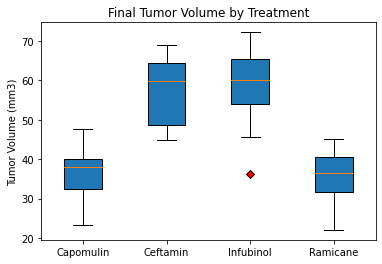

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#First set variables for plot, calling on filtered groups above (probably could have done .loc but I was already doiwn this path)
datasets=[capomulin['Tumor Volume (mm3)'], ceftamin['Tumor Volume (mm3)'], infubinol['Tumor Volume (mm3)'], ramicane['Tumor Volume (mm3)']]
labels = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
red_diamond = dict(markerfacecolor='r', marker='D')

#Plot it

fig1, ax1 = plt.subplots()
ax1.boxplot(datasets, flierprops=red_diamond, labels=labels, patch_artist=True)

#label it
ax1.set_title('Final Tumor Volume by Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
#ax1.yaxis.grid(True)
plt.show()

## Line and Scatter Plots

In [28]:
#Filter down to just the mice treated with Capomulin

capomulin_df=cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin",:]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1439,r157,Capomulin,Male,22,25,0,45.000000,0
1440,r157,Capomulin,Male,22,25,5,45.597064,0
1441,r157,Capomulin,Male,22,25,10,46.059608,0


In [29]:
#Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Choose a sample mouse, in this case I picked i557
sample=capomulin_df.loc[capomulin_df["Mouse ID"] =="i557",:]
sample

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
431,i557,Capomulin,Female,1,24,0,45.000000,0
432,i557,Capomulin,Female,1,24,5,42.261665,0
433,i557,Capomulin,Female,1,24,10,42.992077,0
434,i557,Capomulin,Female,1,24,15,43.529876,0
435,i557,Capomulin,Female,1,24,20,43.967895,0
436,i557,Capomulin,Female,1,24,25,44.596219,0
437,i557,Capomulin,Female,1,24,30,45.261384,0
438,i557,Capomulin,Female,1,24,35,45.941949,0
439,i557,Capomulin,Female,1,24,40,46.821070,1
440,i557,Capomulin,Female,1,24,45,47.685963,1


In [30]:
#define data for plot- to_numpy() puts the values into an array without the index
time=sample['Timepoint'].to_numpy()
size=sample["Tumor Volume (mm3)"].to_numpy()
#size
#time

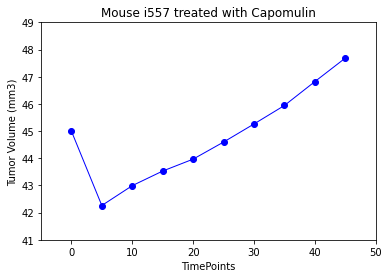

In [31]:
#Generate Plot
plt.plot(time, size,linewidth=1, marker="o", color="blue")
plt.ylim(41, 49)
plt.xlim(-5,50)
#adjust labels
plt.title("Mouse i557 treated with Capomulin")
plt.xlabel("TimePoints")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



In [32]:
# Group the camomulin mice by ID number in order to find mean.
avg_volume=capomulin_df.groupby("Mouse ID")
# avg_volume.count()

In [33]:
#set variable names as means of grouped and filtered Mice 
weight = avg_volume['Weight (g)'].mean()
tumor_vol = avg_volume['Tumor Volume (mm3)'].mean()

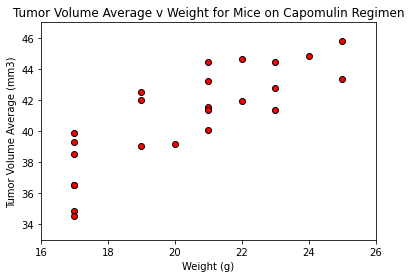

In [34]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(weight, tumor_vol, marker="o", facecolors="red", edgecolors="black")
#set limits w/in one of min max for each measurement
plt.ylim(33, 47)
plt.xlim(16,26)
#set title and labels
plt.title("Tumor Volume Average v Weight for Mice on Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume Average (mm3)")


plt.show()

## Correlation and Regression

In [35]:
#Group the mices by Id to and get the mean to find the average of the tumor over the time ofthe study 
one_per_cap=capomulin_df.groupby("Mouse ID").mean()
one_per_cap.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


The correlation between both factors is 0.84


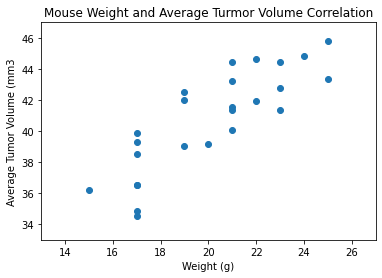

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(one_per_cap.iloc[:,1],one_per_cap.iloc[:,3])

plt.scatter(one_per_cap.iloc[:,1],one_per_cap.iloc[:,3])
plt.ylim(33, 47)
plt.xlim(13,27)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3')
plt.title('Mouse Weight and Average Turmor Volume Correlation')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The r-squared is: 0.7088568047708723


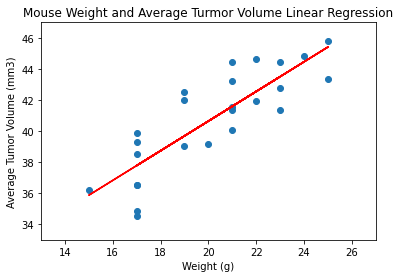

In [37]:
# linear regression model 
# Add the linear regression equation and line to plot
x_values = one_per_cap.iloc[:,1]
y_values = one_per_cap.iloc[:,3]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylim(33, 47)
plt.xlim(13,27)

#Label and format
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight and Average Turmor Volume Linear Regression')
print(f"The r-squared is: {rvalue**2}")
plt.show()